### Step 1 - Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape  # checking the dataset size

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Null values are in the numerical parameters --- replace it with median or mean
#### Null values are in the categorical parameters --- replace it with mode

In [8]:
#### For numerical parameter - null value replacement
df['age'].fillna(df['age'].median(),inplace=True)

In [9]:
#### For categorical parameter - null value replacement
df['smoker'].fillna(df['smoker'].mode(),inplace=True)

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df['region'].nunique()

4

In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [18]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [19]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

### Visualisation

#### Univariate

C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

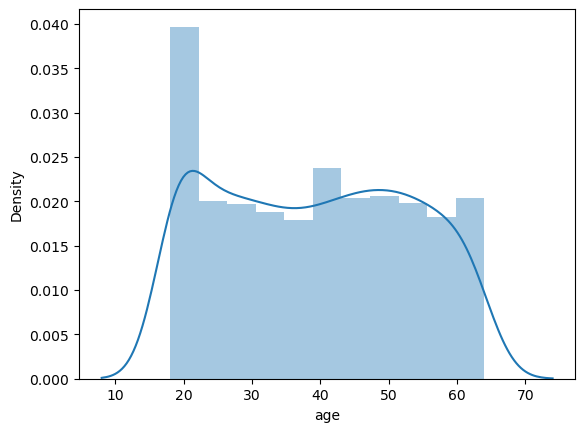

In [20]:
sns.distplot(df['age'])

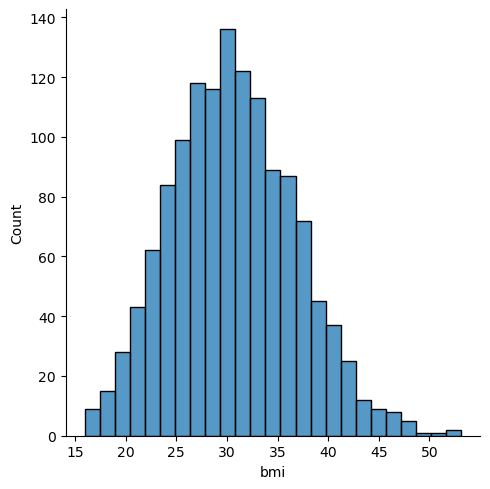

In [21]:
sns.displot(df['bmi'])

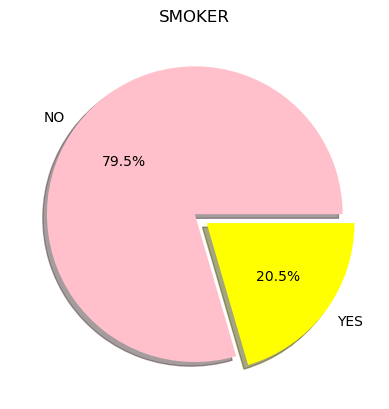

In [22]:
plt.pie(df['smoker'].value_counts(),[0,0.1],labels=['NO','YES'],autopct='%1.1f%%',shadow=True,colors=['pink','yellow'])
plt.title('SMOKER')
plt.show()

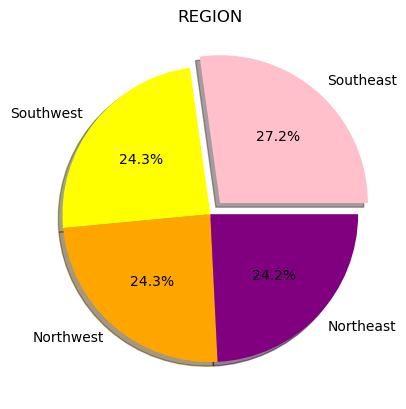

In [23]:
plt.pie(df['region'].value_counts(),[0.1,0,0,0],labels=['Southeast','Southwest','Northwest','Northeast'],autopct='%1.1f%%',shadow=True,colors=['pink','yellow','orange','purple'])
plt.title('REGION')
plt.show()

<AxesSubplot:ylabel='region'>

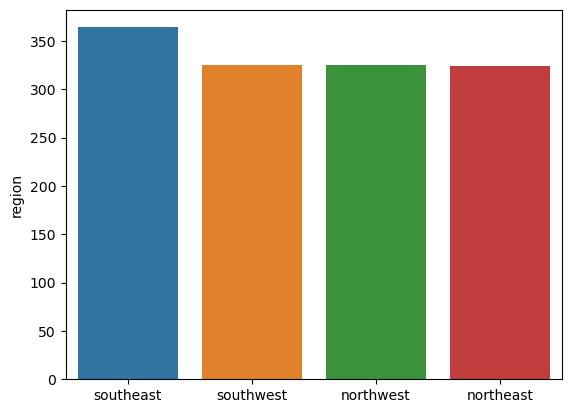

In [24]:
sns.barplot(x=df['region'].value_counts().index,y=df['region'].value_counts())

<AxesSubplot:ylabel='sex'>

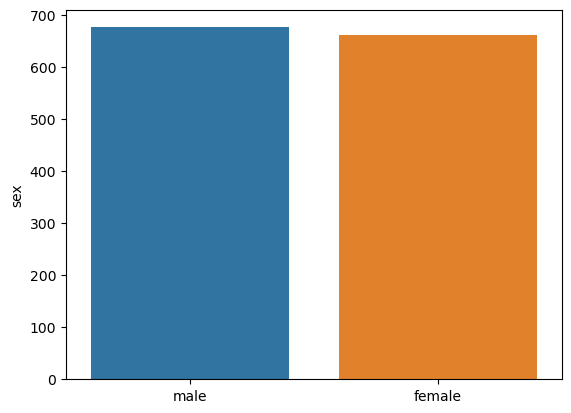

In [25]:
sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts())

#### Bivariante Analysis

<AxesSubplot:xlabel='age', ylabel='charges'>

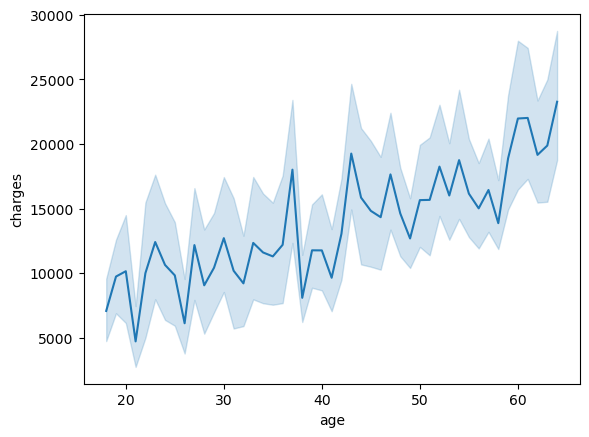

In [26]:
sns.lineplot(x=df['age'],y=df['charges'])

<AxesSubplot:xlabel='age', ylabel='bmi'>

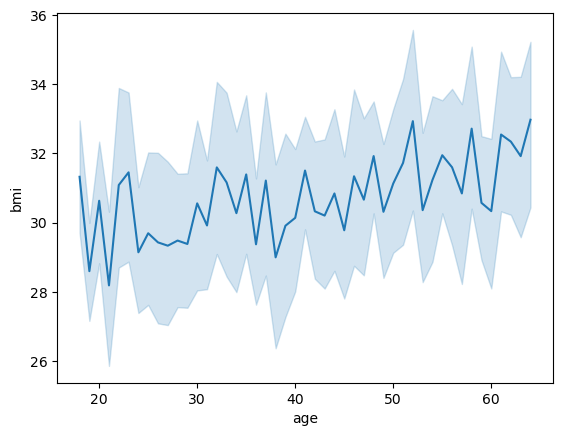

In [27]:
sns.lineplot(x=df['age'],y=df['bmi'])

<AxesSubplot:xlabel='age', ylabel='charges'>

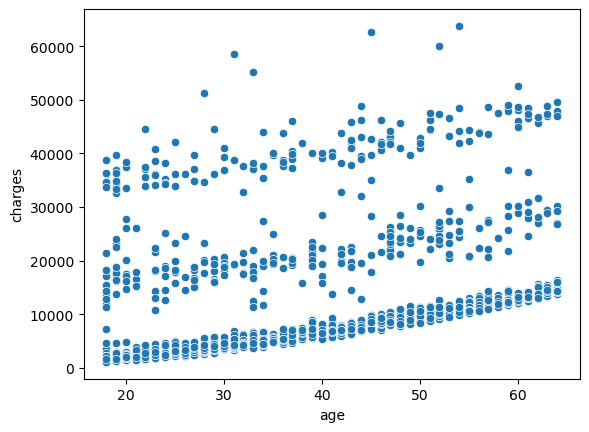

In [28]:
sns.scatterplot(x=df['age'],y=df['charges'])

#### Multivariate analysis

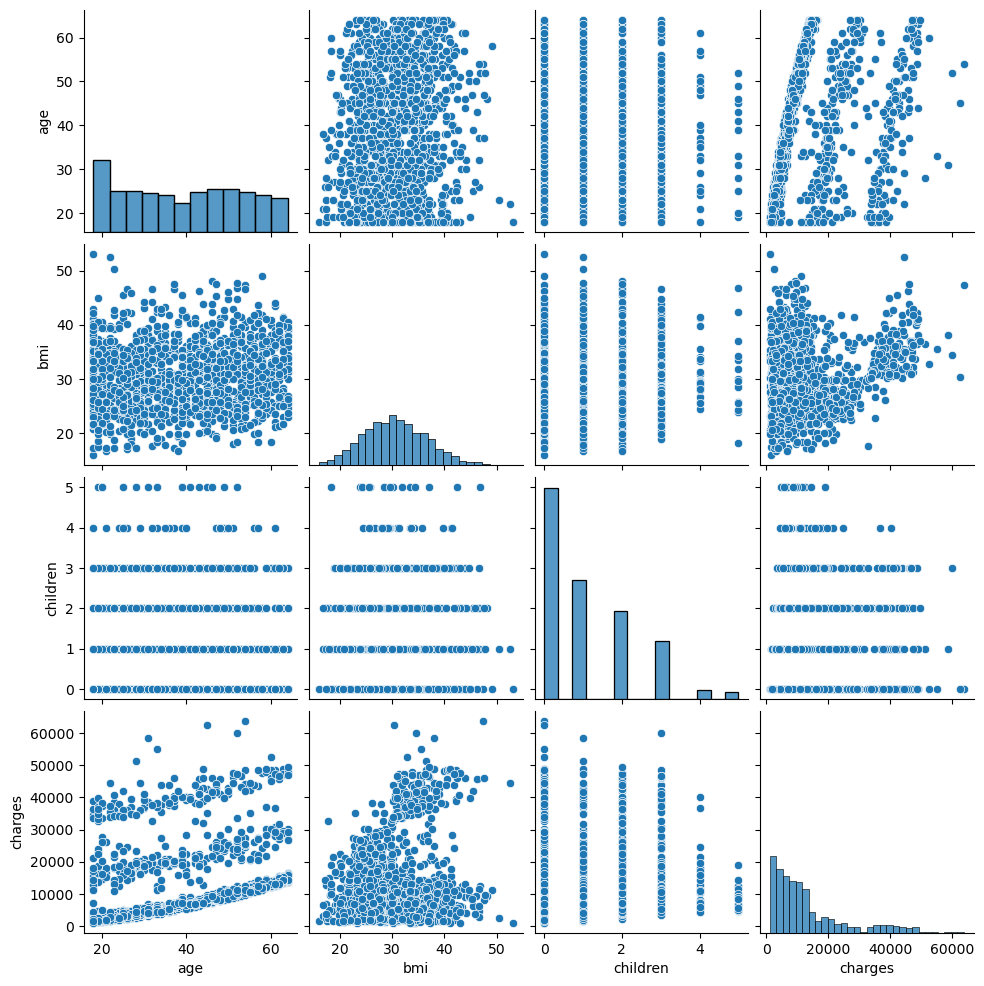

In [29]:
sns.pairplot(df)

<AxesSubplot:>

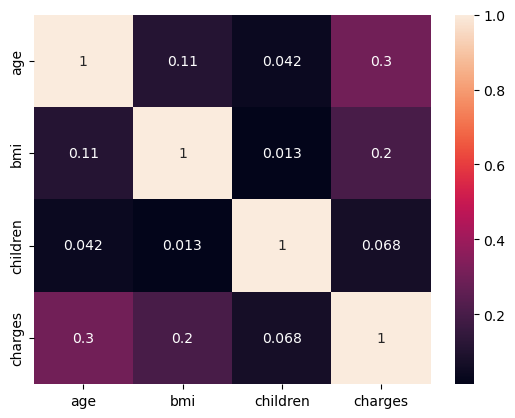

In [30]:
sns.heatmap(df.corr(),annot=True)

### Outlier detection

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

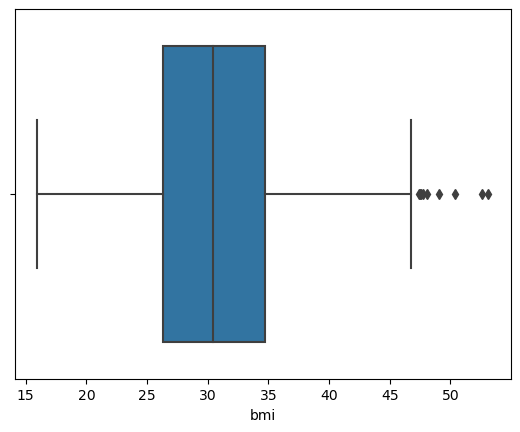

In [32]:
sns.boxplot(df['bmi'])

#### Removal methods - IQR (Inter Quartile Range), Z-score, Percentile method
#### (Outlier removal is not that much important, mostly replacement is performed)

### Outlier removal by replacement with median

In [78]:
q1 = df['bmi'].quantile(0.25) # First quartile
q3 = df['bmi'].quantile(0.75) # Third quartile

In [79]:
print(q1)
print(q3)

26.29625
34.69375


In [80]:
IQR = q3-q1

In [81]:
IQR

8.3975

In [82]:
upper_limit = q3+1.5*IQR

In [83]:
upper_limit

47.290000000000006

In [84]:
lower_limit = q1-1.5*IQR

In [85]:
lower_limit

13.7

In [86]:
df.median()

C:\Users\prate\AppData\Local\Temp\ipykernel_24048\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [87]:
df['bmi'].median()

30.4

In [88]:
df['bmi'] = np.where(df['bmi']>upper_limit,30,df['bmi'])

C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

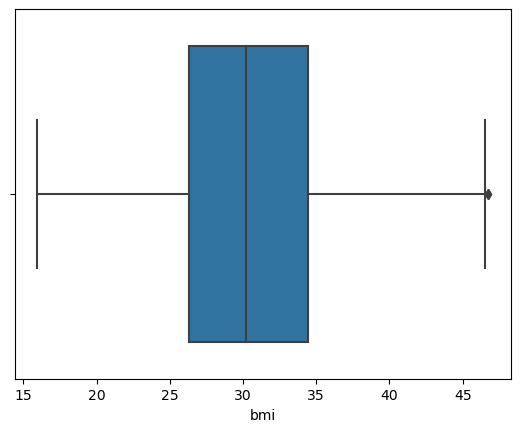

In [89]:
sns.boxplot(df['bmi'])

### 1. Outlier removal using IQR

C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

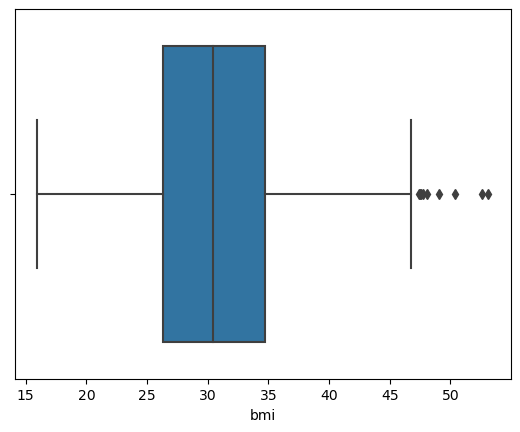

In [53]:
sns.boxplot(df['bmi'])

In [54]:
q1 = df['bmi'].quantile(0.25) # First quartile
q3 = df['bmi'].quantile(0.75) # Third quartile

In [55]:
IQR = q3-q1

In [56]:
upper_limit = q3+1.5*IQR

In [57]:
upper_limit

47.290000000000006

In [58]:
df_new = df[df['bmi']<upper_limit]

In [59]:
df_new.shape

(1329, 7)

### 2. Z-score method for outlier removal

In [61]:
from scipy import stats

In [62]:
bmi_zscore = stats.zscore(df['bmi'])
bmi_zscore

0      -0.453320
1       0.509621
2       0.383307
3      -1.305531
4      -0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336   -0.797813
1337   -0.261388
Name: bmi, Length: 1338, dtype: float64

In [63]:
df_new[np.abs(bmi_zscore)<=3]

C:\Users\prate\AppData\Local\Temp\ipykernel_24048\275073239.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new[np.abs(bmi_zscore)<=3]


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [67]:
df_z = df[np.abs(bmi_zscore)<=3]

In [68]:
df_z

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

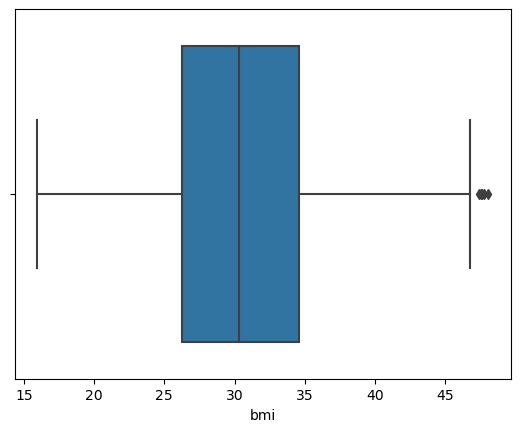

In [69]:
sns.boxplot(df_z['bmi'])

### 3. Outlier removal using percentile

C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

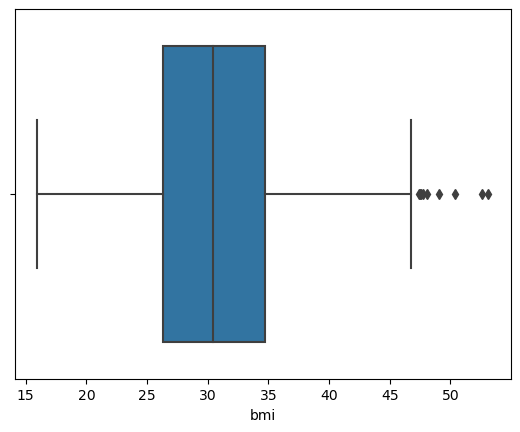

In [70]:
sns.boxplot(df['bmi'])

In [71]:
p99 = df['bmi'].quantile(0.99)

In [72]:
p99

46.40789999999996

In [73]:
df_percentile = df[df['bmi']<=p99]

In [74]:
df_percentile

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:xlabel='bmi'>

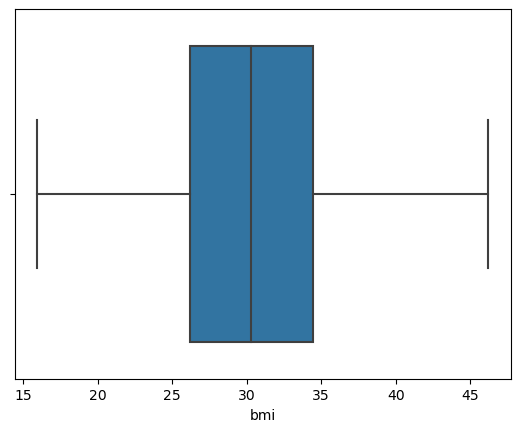

In [76]:
sns.boxplot(df_percentile['bmi'])

## Encoding

### 1. Label Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le = LabelEncoder()

In [92]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

In [93]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### 2. One-hot Encoding method

In [94]:
df_onehot = pd.get_dummies(df,columns = ['region'])
df_onehot.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [95]:
df_onehot.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.114259,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.039625,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.114259,0.039625,1.000000,0.017435,-0.003052,0.190312,-0.135711,-0.128108,0.253283,0.000838
children,0.042469,0.017163,0.017435,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,-0.003052,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.190312,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.135711,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.128108,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.253283,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,0.000838,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

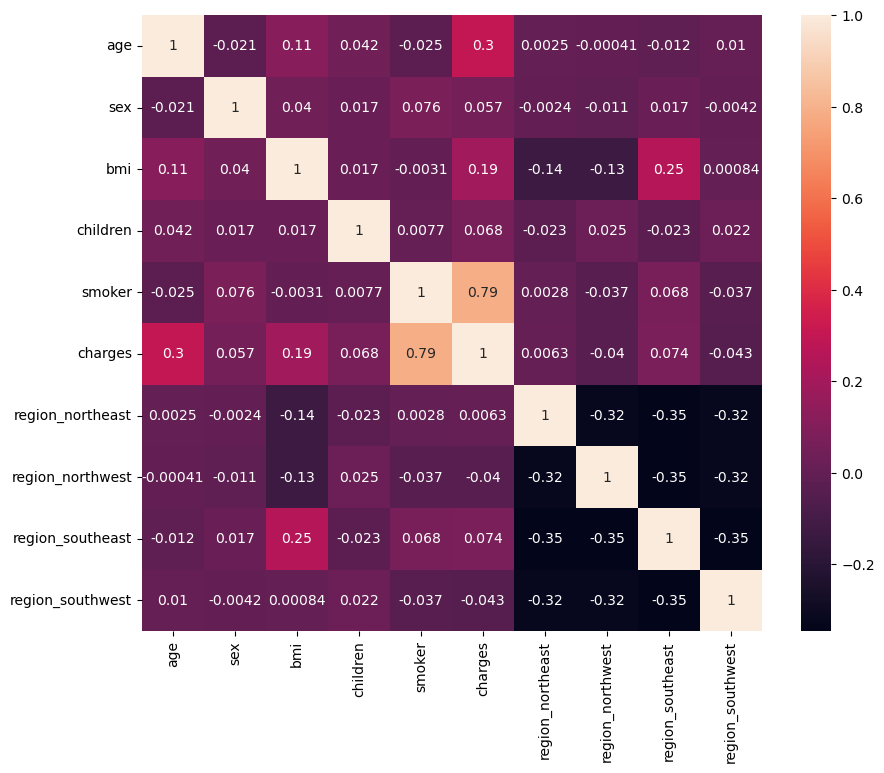

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(df_onehot.corr(),annot=True)

In [98]:
df_onehot.corr()['charges'].sort_values(ascending=False)

charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.190312
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

### x and y splitting, independent variable and dependent varriable

In [99]:
y = df_onehot['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [100]:
x = df_onehot.drop(columns = ['charges'],axis=1)
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


### Scaling on independent variables

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scale = MinMaxScaler()

In [104]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.387788,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.578435,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.553426,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.219065,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.419617,0.0,0.0,0.0,1.0,0.0,0.0


### Train test split

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [106]:
x_train.shape

(936, 9)

In [108]:
y_train.shape

(936,)

In [107]:
x_test.shape

(402, 9)

In [109]:
y_test.shape

(402,)

In [110]:
x_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1163,0.000000,0.0,0.398019,0.0,0.0,1.0,0.0,0.0,0.0
196,0.456522,0.0,0.546931,0.0,0.0,0.0,0.0,0.0,1.0
438,0.739130,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0
183,0.565217,0.0,0.339396,0.0,0.0,0.0,1.0,0.0,0.0
1298,0.326087,1.0,0.373335,0.4,0.0,0.0,1.0,0.0,0.0
